# **Customer Churn Prediction**


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Loading and viewing the data

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Exploration

In [4]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [5]:
# checking for nan values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Preprocessing

We are going to preprocess the following columns :
* Gender using ```Label Encoding```
* Geography using ```pd.get_dummies()```

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=columns_to_drop)

In [11]:
# label encoding Gender column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [12]:
df = pd.get_dummies(df)

In [13]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


**Splitting into X and y values**

In [15]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [16]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


In [17]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

**Splitting into Training and Testing Data**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 12), (8000,), (2000, 12), (2000,))

### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_train

array([[ 0.16958176, -1.09168714, -0.46460796, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.91601335,  0.30102557, ..., -1.01460667,
         1.75486502, -0.57369368],
       [-1.19119591, -1.09168714, -0.94312892, ...,  0.98560362,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 ,  0.91601335, -0.36890377, ...,  0.98560362,
        -0.5698444 , -0.57369368],
       [-0.62420521, -1.09168714, -0.08179119, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-0.28401079, -1.09168714,  0.87525072, ..., -1.01460667,
         1.75486502, -0.57369368]])

In [22]:
X_test

array([[-0.55204276, -1.09168714, -0.36890377, ..., -1.01460667,
         1.75486502, -0.57369368],
       [-1.31490297, -1.09168714,  0.10961719, ...,  0.98560362,
        -0.5698444 , -0.57369368],
       [ 0.57162971, -1.09168714,  0.30102557, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227,  0.91601335, -0.27319958, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-0.00566991,  0.91601335, -0.46460796, ..., -1.01460667,
         1.75486502, -0.57369368],
       [-0.79945688,  0.91601335, -0.84742473, ..., -1.01460667,
         1.75486502, -0.57369368]])

In [23]:
X_train.shape, y_test.shape

((8000, 12), (2000,))

## Model Building

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [25]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),# create filepath to save model
                                            monitor='val_accuracy',
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [26]:
# Creating model3
model3 = Sequential()
model3.add(Dense(256, activation='relu', input_dim=12))
model3.add(Dropout(0.5))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

# Compiling our model3
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# Training our model3
history3 = model3.fit(X_train, y_train, epochs=120, batch_size=32, validation_data=(X_test, y_test),
                      callbacks=[create_model_checkpoint(model_name='model1')])

Epoch 1/120
250/250 [==============================] - 14s 21ms/step - loss: 0.5162 - accuracy: 0.7832 - val_loss: 0.4399 - val_accuracy: 0.7975
Epoch 2/120
250/250 [==============================] - 2s 9ms/step - loss: 0.4630 - accuracy: 0.7969 - val_loss: 0.4329 - val_accuracy: 0.7975
Epoch 3/120
250/250 [==============================] - 4s 17ms/step - loss: 0.4454 - accuracy: 0.8014 - val_loss: 0.4081 - val_accuracy: 0.8355
Epoch 4/120
250/250 [==============================] - 3s 12ms/step - loss: 0.4309 - accuracy: 0.8111 - val_loss: 0.3992 - val_accuracy: 0.8555
Epoch 5/120
250/250 [==============================] - 3s 13ms/step - loss: 0.4078 - accuracy: 0.8273 - val_loss: 0.3705 - val_accuracy: 0.8615
Epoch 6/120
250/250 [==============================] - 1s 4ms/step - loss: 0.3960 - accuracy: 0.8326 - val_loss: 0.3583 - val_accuracy: 0.8610
Epoch 7/120
250/250 [==============================] - 1s 5ms/step - loss: 0.3869 - accuracy: 0.8407 - val_loss: 0.3524 - val_accuracy: 0

## Model Evaluation

In [27]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
def evaluation_report(y_true, y_pred):
  print(f'Accuracy Score : {accuracy_score(y_true, y_pred)}')
  print(f'Precision Score : {precision_score(y_true, y_pred)}')
  print(f'Recall Score : {recall_score(y_true, y_pred)}')
  print(f'F1 Score : {f1_score(y_true, y_pred)}')
  print(confusion_matrix(y_true, y_pred))

### Model 3

In [28]:
model3.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8610


[0.3424060642719269, 0.8610000014305115]

In [32]:
model3 = tf.keras.models.load_model('/content/model_experiments/model1')
model3.evaluate(X_test, y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.3436 - accuracy: 0.8680


[0.3436327576637268, 0.8679999709129333]

In [33]:
y_preds3 = tf.round(model3.predict(X_test))

63/63 [==============================] - 0s 2ms/step


In [34]:
evaluation_report(y_test, y_preds3)

Accuracy Score : 0.868
Precision Score : 0.7764705882352941
Recall Score : 0.4888888888888889
F1 Score : 0.6
[[1538   57]
 [ 207  198]]


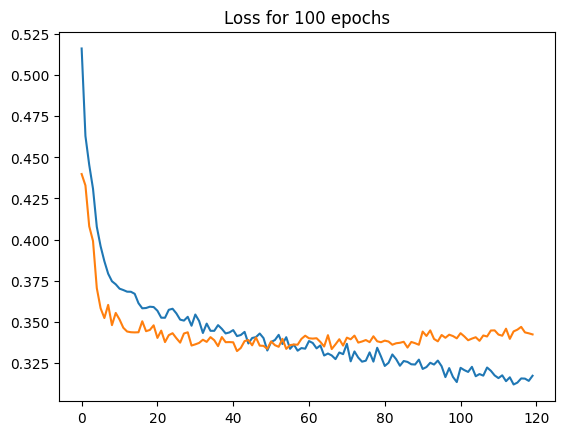

In [35]:
import matplotlib.pyplot as plt
plt.title('Loss for 100 epochs')
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

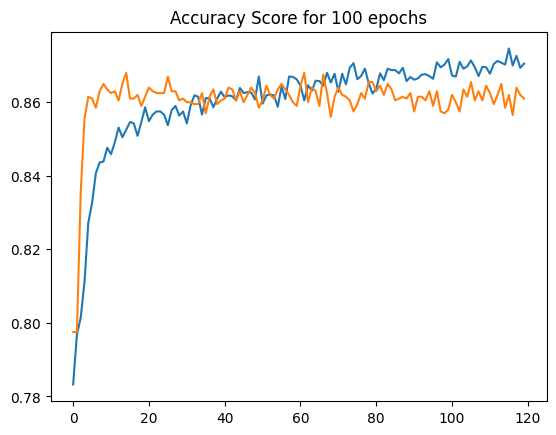

In [36]:
plt.title('Accuracy Score for 100 epochs')
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])

✅ **Note:** We can say model 3 are making very good predictions with 85% accuracy on average

## Making a helper function to make single predictions using model

In [37]:
X_test[200].shape

(12,)

In [38]:
def single_predictions(index):
  y_true = y_test.iloc[index]
  input_tensor = tf.expand_dims(tf.constant(X_test[index]), axis=0)
  y_preds3 = model3.predict(input_tensor)
  print(f'Input Params : \n {X_test[index]}')
  print(f'Y True : {y_true}')
  print('---------------------')
  print(f'Model 3 Predictions : {tf.squeeze(tf.round(y_preds3)).numpy()}')

In [39]:
single_predictions(1999)

1/1 [==============================] - 0s 69ms/step
Input Params : 
 [-0.79945688  0.91601335 -0.84742473  1.04473698  0.82026342 -0.92159124
  0.64259497 -1.03227043  1.61255917 -1.01460667  1.75486502 -0.57369368]
Y True : 0
---------------------
Model 3 Predictions : 0.0


In [40]:
single_predictions(67)

1/1 [==============================] - 0s 18ms/step
Input Params : 
 [-1.54169924 -1.09168714  0.20532138 -0.68538967  1.08959365 -0.92159124
  0.64259497 -1.03227043  1.25041453  0.98560362 -0.5698444  -0.57369368]
Y True : 0
---------------------
Model 3 Predictions : 0.0


## Saving and Loading our models

In [42]:
import pickle
pickle.dump(sc, open('scaler.pkl', 'wb'))
model3.save('model3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
